Demo of using a complex metric with reduce functions, the 'completeness' metric.

In [1]:
from __future__ import print_function
from future.utils import itervalues

import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils

Connect to opsim database as usual, and get information on the proposals and the requested number of visits, in order to configure the 'completeness' metric.

In [2]:
runName = 'baseline2018a'
opsdb = db.OpsimDatabase(runName+'.db')
version = opsdb.opsimVersion

In [3]:
propinfo, proptags = opsdb.fetchPropInfo()
reqvisits = opsdb.fetchRequestedNvisits(proptags['WFD'])
print (reqvisits)

{'u': 75, 'g': 105, 'r': 240, 'i': 240, 'z': 210, 'y': 210}


Set up metric and slicer, and generate a sql constraint for the WFD proposal using a MAF utility. Set the limits we want for the x/color range in the plotDict.

In [4]:
completeness_metric = metrics.CompletenessMetric(
    u=reqvisits['u'], g=reqvisits['g'], r=reqvisits['r'],
    i=reqvisits['i'], z=reqvisits['z'], y=reqvisits['y'])

slicer = slicers.OpsimFieldSlicer()

sqlconstraint = opsdb.createSQLWhere('WFD', proptags)

summaryMetric = metrics.TableFractionMetric()
plotDict = {'xMin': 0, 'xMax': 1.2, 'colorMin': 0,
            'colorMax': 1.2, 'binsize': 0.025}

Instantiate the metric bundle, and turn it into a dictionary, then set up the metricbundlegroup.

In [5]:
completeness = metricBundles.MetricBundle(
    metric=completeness_metric, slicer=slicer, constraint=sqlconstraint,
    runName=runName, summaryMetrics=summaryMetric, plotDict=plotDict)

In [6]:
bdict = {'completeness': completeness}

In [7]:
outDir = 'completeness_test'
resultsDb = db.ResultsDb(outDir=outDir)
bg = metricBundles.MetricBundleGroup(bdict, opsdb, outDir=outDir,
                                     resultsDb=resultsDb)

Run it! This also runs all 'reduce' methods (via MetricBundleGroup.reduceAll()) and 'summary metrics' (via MetricBundleGroup.summaryAll()). 

In [8]:
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 3 for columns ['fieldDec', 'fieldRA', 'filter']
Found 2049326 visits
Running:  ['completeness']


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:97: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "proposalId = 3" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/plotHandler.py:517: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


Plotting complete.


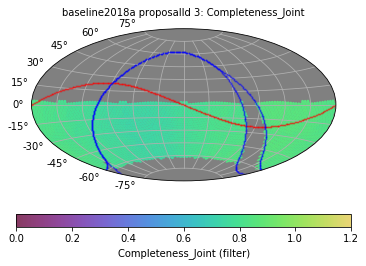

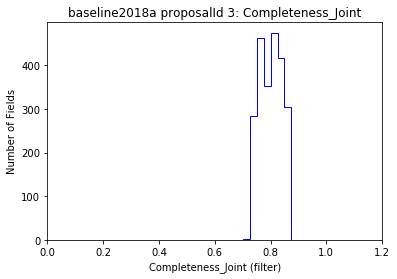

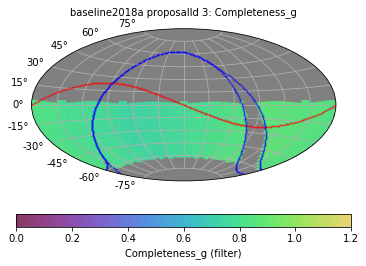

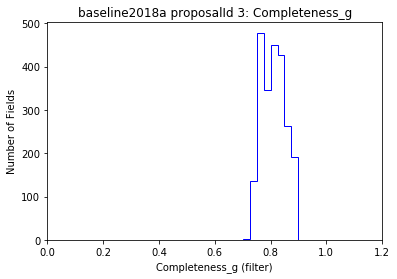

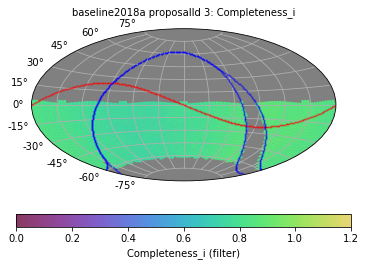

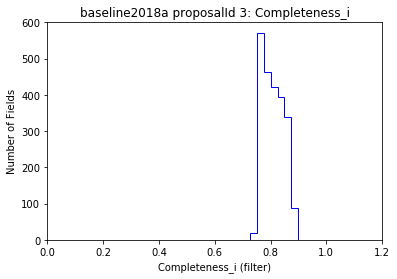

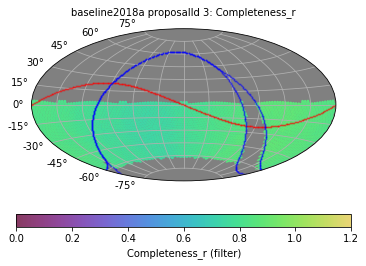

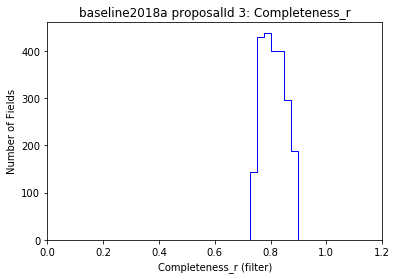

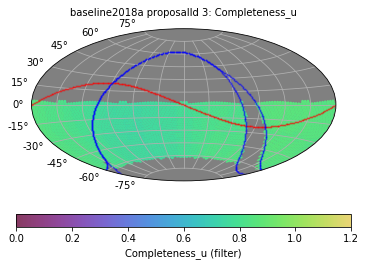

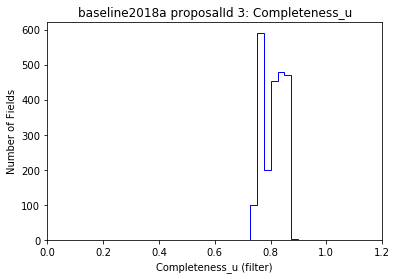

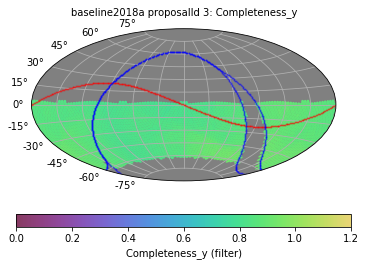

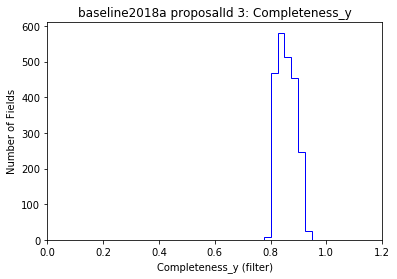

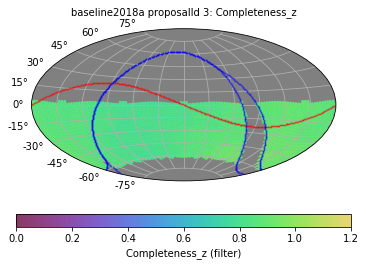

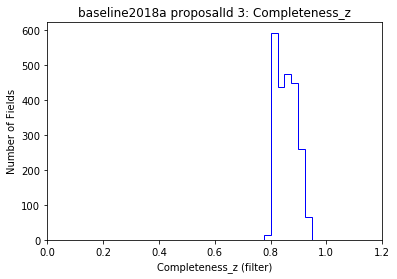

In [9]:
bg.plotAll(closefigs=False)

In [10]:
for b in itervalues(bdict):
    print (b.metric.name, b.summaryMetrics, b.summaryValues)

Completeness [] {}
Completeness_Joint [<lsst.sims.maf.metrics.summaryMetrics.TableFractionMetric object at 0x7fc3d77a4eb8>] {'TableFraction': array([('0 == P',     0.), ('0 < P < 0.1',     0.),
       ('0.1 <= P < 0.2',     0.), ('0.2 <= P < 0.3',     0.),
       ('0.3 <= P < 0.4',     0.), ('0.4 <= P < 0.5',     0.),
       ('0.5 <= P < 0.6',     0.), ('0.6 <= P < 0.7',     0.),
       ('0.7 <= P < 0.8',  1098.), ('0.8 <= P < 0.9',  1195.),
       ('0.9 <= P < 1',     0.), ('1 == P',     0.), ('1 < P',     0.)],
      dtype=[('name', '<U20'), ('value', '<f8')])}
Completeness_g [<lsst.sims.maf.metrics.summaryMetrics.TableFractionMetric object at 0x7fc3d77a4eb8>] {'TableFraction': array([('0 == P',     0.), ('0 < P < 0.1',     0.),
       ('0.1 <= P < 0.2',     0.), ('0.2 <= P < 0.3',     0.),
       ('0.3 <= P < 0.4',     0.), ('0.4 <= P < 0.5',     0.),
       ('0.5 <= P < 0.6',     0.), ('0.6 <= P < 0.7',     0.),
       ('0.7 <= P < 0.8',   961.), ('0.8 <= P < 0.9',  1332.),
       